# Contents
1. Imports
2. Checks
3. Crossed Profile

# 1. Imports

In [19]:
#Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#Path
path = r'/Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store'

In [21]:
#Dataset
df = pd.read_pickle(os.path.join(path, '02 - Data', 'Prepared Data', 'modelled_dataset.pkl'))

# 2. Checks

In [23]:
#Dimensions
df.shape

(32403719, 44)

In [24]:
#Preview
df.head()

,order_id,user_id,user_order_count,order_day_of_week,order_hour_of_day,days_since_last_order,is_first_order,product_id,add_to_cart_order,reordered,...,spending_score,activity_score,frequency_score,loyalty_score,loyalty_flag,region,age_profile,income_profile,parental_status,family_status
0,2539329,1,1,Monday,8,NaN,True,196,1,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family
1,2539329,1,1,Monday,8,NaN,True,14084,2,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family
2,2539329,1,1,Monday,8,NaN,True,12427,3,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family
3,2539329,1,1,Monday,8,NaN,True,26088,4,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family
4,2539329,1,1,Monday,8,NaN,True,26405,5,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family


# 3. Crossed Profiles

In [26]:
from itertools import combinations

# List of categorical variables
variables = ['Region', 'Age', 'Income', 'Family', 'Loyalty']

# Generate unique pairs (order matters)
unique_pairs = list(combinations(variables, 2))

# Display result
for pair in unique_pairs:
    print(f"{pair[0]} x {pair[1]}")

Region x Age
Region x Income
Region x Family
Region x Loyalty
Age x Income
Age x Family
Age x Loyalty
Income x Family
Income x Loyalty
Family x Loyalty


## 3.1. Activity Flag

### 3.1.1. Spending Flag

In [29]:
# Create a cross-tabulation
cross_activity_spending = pd.crosstab(df['activity_flag'], df['spending_flag'])
cross_activity_spending

spending_flag,Low Spender,Moderate Spender,High Spender,Premium Spender
activity_flag,,,,
Low Activity,2358438,3734482,2209171,191821
Moderate Activity,3834677,8147762,3804982,153339
High Activity,1911842,4307559,1709424,40222


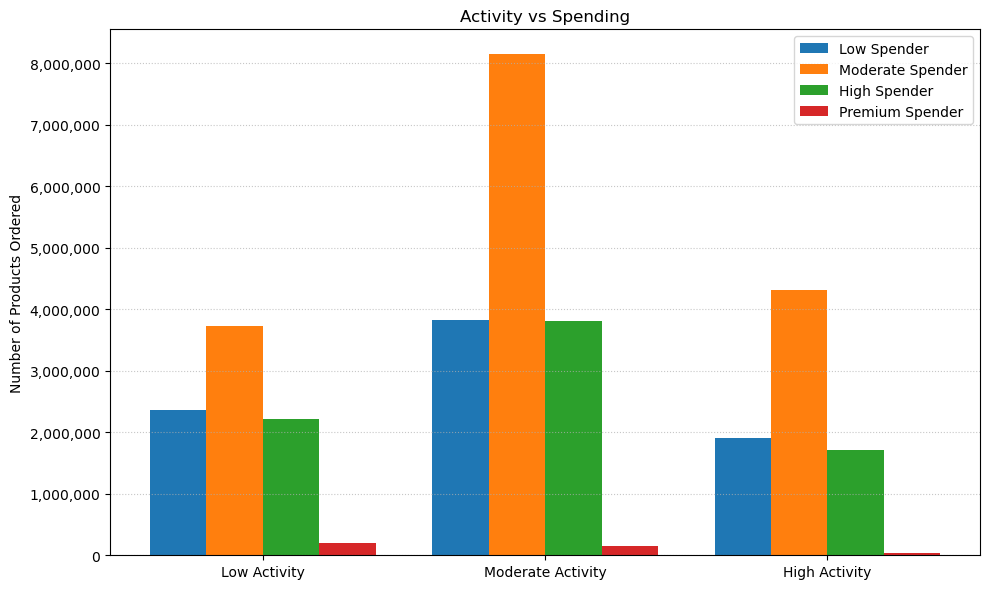

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.1.1_activity_spending.png


In [30]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_activity_spending.index))

# Plot each category as a separate bar (grouped format)
for i, activity_spending in enumerate(cross_activity_spending.columns):
    plt.bar(
        x + i * bar_width, 
        cross_activity_spending[activity_spending], 
        width=bar_width, 
        label=activity_spending
    )

# Formatting
plt.title('Activity vs Spending')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_activity_spending.columns) - 1) / 2), cross_activity_spending.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.1.1_activity_spending.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.1.2. Frequency Flag

In [32]:
# Create a cross-tabulation
cross_activity_frequency = pd.crosstab(df['activity_flag'], df['frequency_flag'])
cross_activity_frequency

frequency_flag,Rare Shopper,Occasional Shopper,Frequent Shopper
activity_flag,,,
Low Activity,5200789,2546930,746193
Moderate Activity,2488737,10698341,2753682
High Activity,0,1377721,6591326


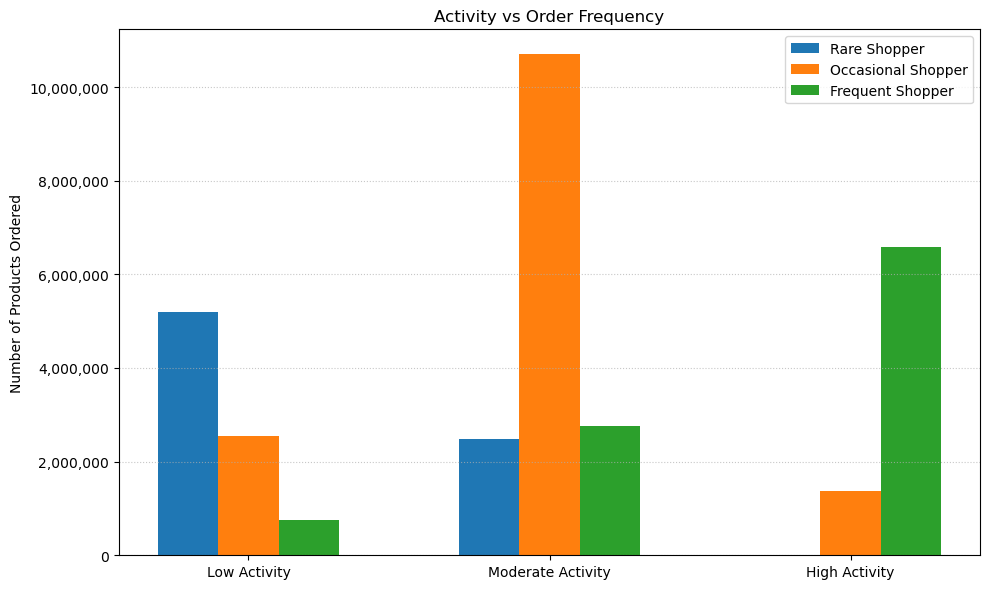

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.1.2_activity_frequency.png


In [33]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_activity_frequency.index))

# Plot each category as a separate bar (grouped format)
for i, activity_frequency in enumerate(cross_activity_frequency.columns):
    plt.bar(
        x + i * bar_width, 
        cross_activity_frequency[activity_frequency], 
        width=bar_width, 
        label=activity_frequency
    )

# Formatting
plt.title('Activity vs Order Frequency')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')


# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_activity_frequency.columns) - 1) / 2), cross_activity_frequency.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.1.2_activity_frequency.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.1.3. Loyalty Flag

In [35]:
# Create a cross-tabulation
cross_activity_loyalty = pd.crosstab(df['activity_flag'], df['loyalty_flag'])
cross_activity_loyalty

loyalty_flag,Low Loyalty,Moderate Loyalty,High Loyalty
activity_flag,,,
Low Activity,7113377,1360508,20027
Moderate Activity,4402598,10737006,801156
High Activity,0,2610411,5358636


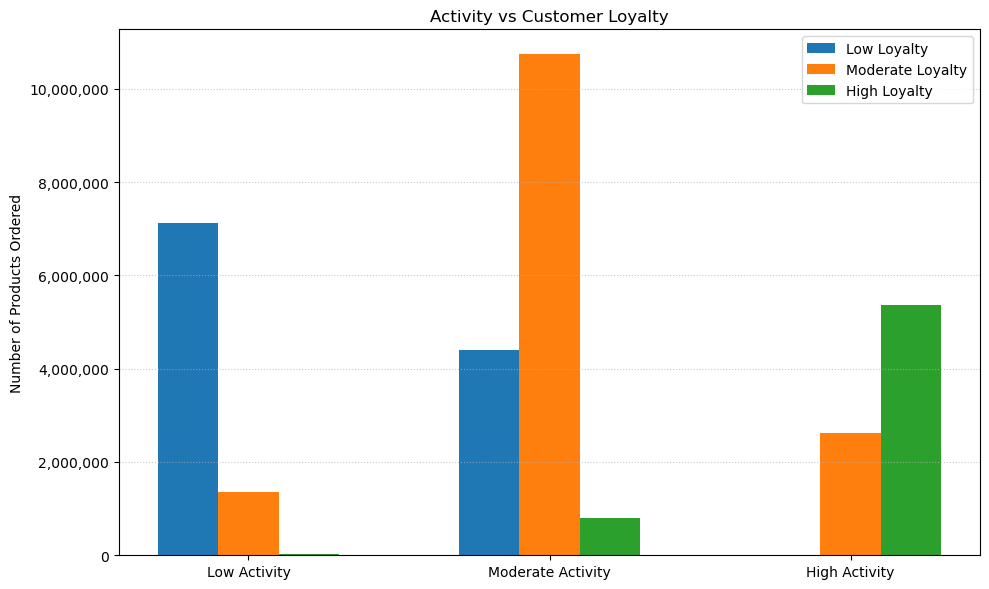

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.1.3_activity_loyalty.png


In [36]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_activity_loyalty.index))

# Plot each category as a separate bar (grouped format)
for i, activity_loyalty in enumerate(cross_activity_loyalty.columns):
    plt.bar(
        x + i * bar_width, 
        cross_activity_loyalty[activity_loyalty], 
        width=bar_width, 
        label=activity_loyalty
    )

# Formatting
plt.title('Activity vs Customer Loyalty')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_activity_loyalty.columns) - 1) / 2), cross_activity_loyalty.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.1.3_activity_loyalty.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.1.4. Region

In [38]:
# Create a cross-tabulation
cross_activity_region = pd.crosstab(df['activity_flag'], df['region'])
cross_activity_region

region,West,Midwest,South,Northeast
activity_flag,,,,
Low Activity,2164805,2008624,2824760,1495723
Moderate Activity,4017636,3789791,5316453,2816880
High Activity,2110200,1798600,2650300,1409947


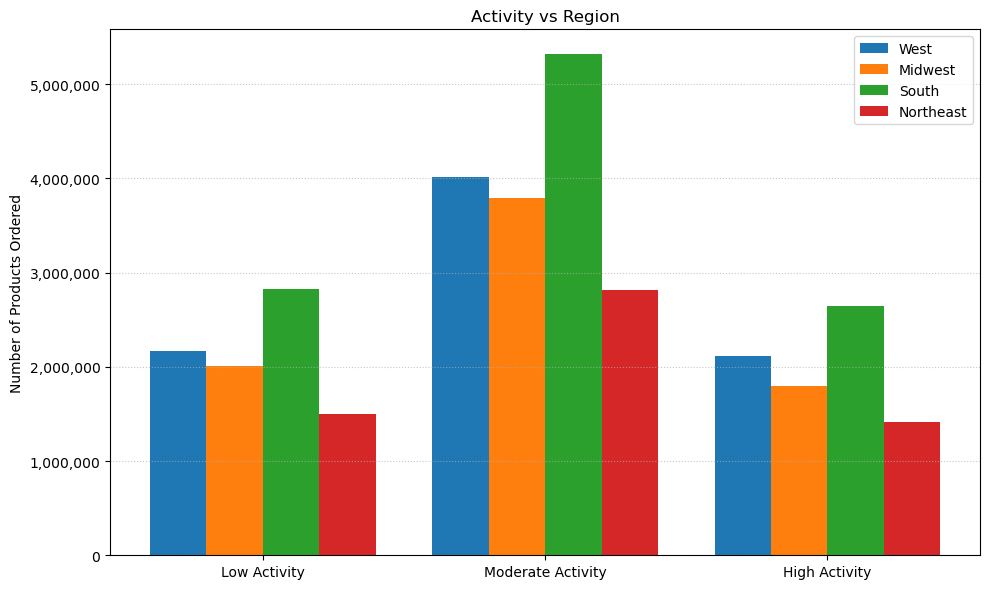

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.1.4_activity_region.png


In [39]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_activity_region.index))

# Plot each category as a separate bar (grouped format)
for i, activity_region in enumerate(cross_activity_region.columns):
    plt.bar(
        x + i * bar_width, 
        cross_activity_region[activity_region], 
        width=bar_width, 
        label=activity_region
    )

# Formatting
plt.title('Activity vs Region')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_activity_region.columns) - 1) / 2), cross_activity_region.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.1.4_activity_region.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.1.5. Age_Profile

In [41]:
# Create a cross-tabulation
cross_activity_age = pd.crosstab(df['activity_flag'], df['age_profile'])
cross_activity_age

age_profile,Young Adult,Adult,Middle Aged,Senior
activity_flag,,,,
Low Activity,1057249,2637586,2658087,2140990
Moderate Activity,2002801,5030594,4927303,3980062
High Activity,984981,2487610,2529717,1966739


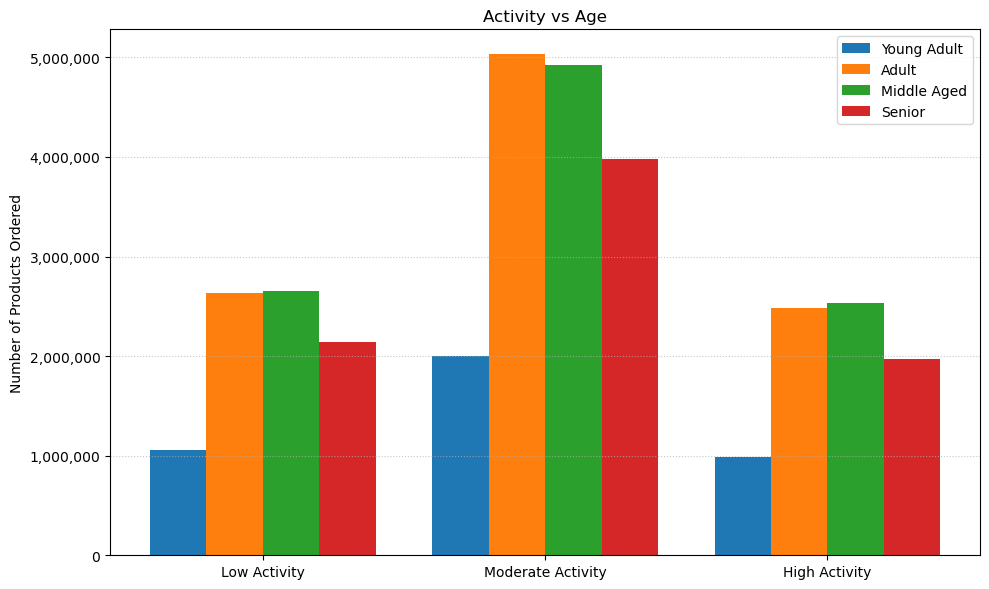

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.1.5_activity_age.png


In [42]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_activity_age.index))

# Plot each category as a separate bar (grouped format)
for i, activity_age in enumerate(cross_activity_age.columns):
    plt.bar(
        x + i * bar_width, 
        cross_activity_age[activity_age], 
        width=bar_width, 
        label=activity_age
    )

# Formatting
plt.title('Activity vs Age')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_activity_age.columns) - 1) / 2), cross_activity_age.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.1.5_activity_age.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.1.6. Income_Profile

In [44]:
# Create a cross-tabulation
cross_activity_income = pd.crosstab(df['activity_flag'], df['income_profile'])
cross_activity_income

income_profile,Low Income,Middle Income,High Income
activity_flag,,,
Low Activity,2167614,4107132,2219166
Moderate Activity,3587654,8080612,4272494
High Activity,1765665,4064401,2138981


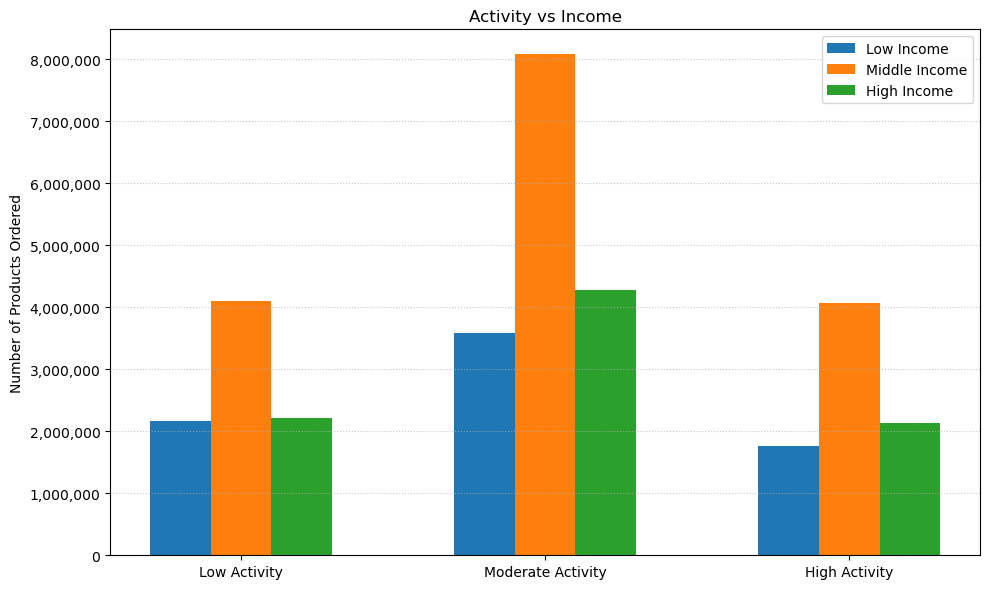

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.1.6_activity_income.png


In [45]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_activity_income.index))

# Plot each category as a separate bar (grouped format)
for i, activity_income in enumerate(cross_activity_income.columns):
    plt.bar(
        x + i * bar_width, 
        cross_activity_income[activity_income], 
        width=bar_width, 
        label=activity_income
    )

# Formatting
plt.title('Activity vs Income')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_activity_income.columns) - 1) / 2), cross_activity_income.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.1.6_activity_income.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.1.7. Family_Status

In [47]:
# Create a cross-tabulation
cross_activity_family = pd.crosstab(df['activity_flag'], df['family_status'])
cross_activity_family

family_status,Single Adult,Young Parent,Family
activity_flag,,,
Low Activity,2110817,396940,5986155
Moderate Activity,3972371,773165,11195224
High Activity,2014109,380440,5574498


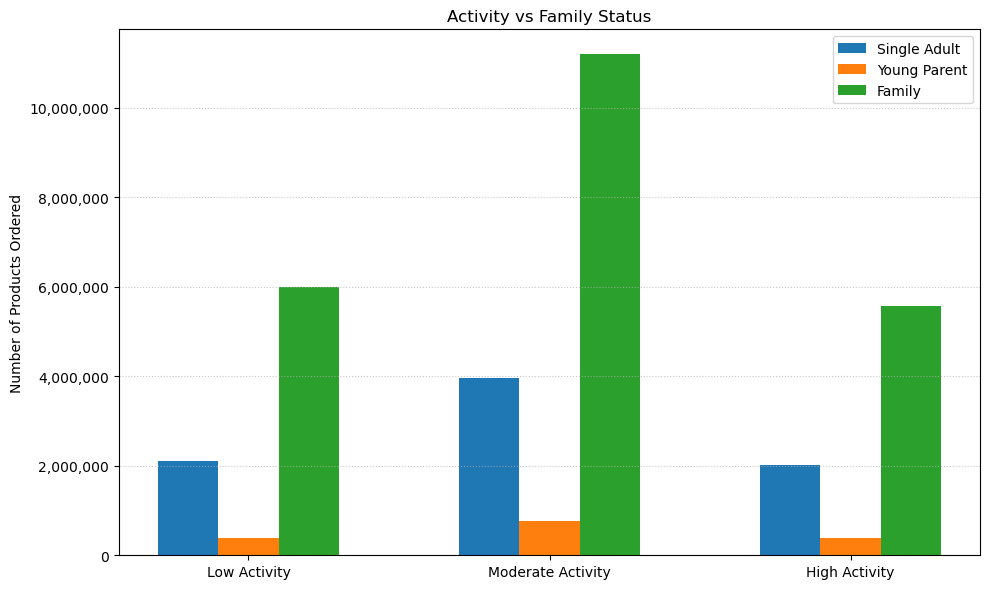

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.1.7_activity_family.png


In [48]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_activity_family.index))

# Plot each category as a separate bar (grouped format)
for i, activity_family in enumerate(cross_activity_family.columns):
    plt.bar(
        x + i * bar_width, 
        cross_activity_family[activity_family], 
        width=bar_width, 
        label=activity_family
    )

# Formatting
plt.title('Activity vs Family Status')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_activity_family.columns) - 1) / 2), cross_activity_family.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.1.7_activity_family.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 3.2. Spending Flag

### 3.2.1. Activity Flag

In [51]:
# Create a cross-tabulation
cross_spending_activity = pd.crosstab(df['spending_flag'], df['activity_flag'])
cross_spending_activity

activity_flag,Low Activity,Moderate Activity,High Activity
spending_flag,,,
Low Spender,2358438,3834677,1911842
Moderate Spender,3734482,8147762,4307559
High Spender,2209171,3804982,1709424
Premium Spender,191821,153339,40222


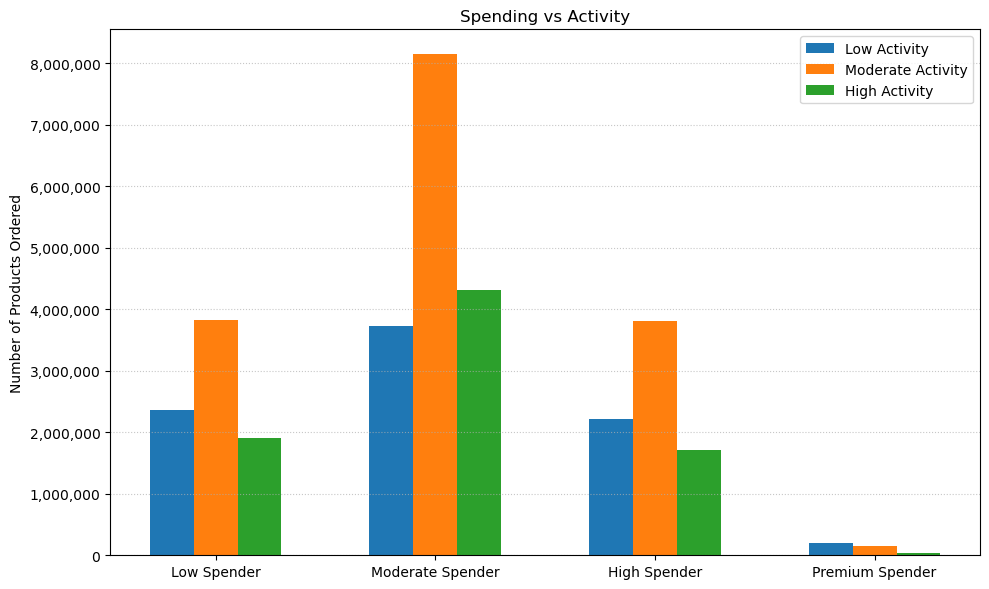

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.2.1_spending_activity.png


In [52]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_spending_activity.index))

# Plot each category as a separate bar (grouped format)
for i, spending_activity in enumerate(cross_spending_activity.columns):
    plt.bar(
        x + i * bar_width, 
        cross_spending_activity[spending_activity], 
        width=bar_width, 
        label=spending_activity
    )

# Formatting
plt.title('Spending vs Activity')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_spending_activity.columns) - 1) / 2), cross_spending_activity.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.2.1_spending_activity.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.2.2. Frequency Flag

In [54]:
# Create a cross-tabulation
cross_spending_frequency = pd.crosstab(df['spending_flag'], df['frequency_flag'])
cross_spending_frequency

frequency_flag,Rare Shopper,Occasional Shopper,Frequent Shopper
spending_flag,,,
Low Spender,2109265,3651333,2344359
Moderate Spender,3484638,7366217,5338948
High Spender,1953774,3448690,2321113
Premium Spender,141849,156752,86781


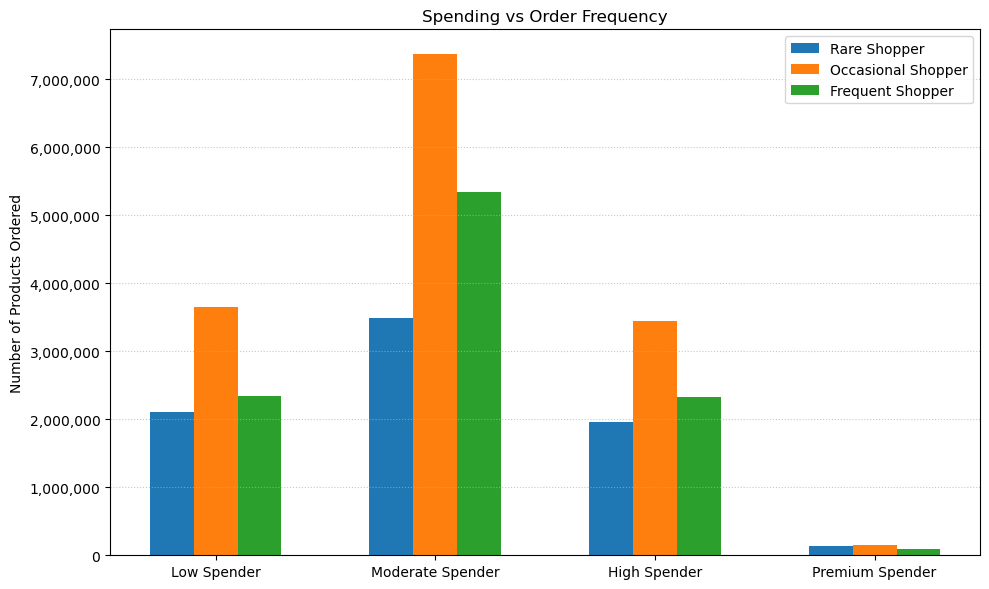

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.2.2_spending_frequency.png


In [55]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_spending_frequency.index))

# Plot each category as a separate bar (grouped format)
for i, spending_frequency in enumerate(cross_spending_frequency.columns):
    plt.bar(
        x + i * bar_width, 
        cross_spending_frequency[spending_frequency], 
        width=bar_width, 
        label=spending_frequency
    )

# Formatting
plt.title('Spending vs Order Frequency')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_spending_frequency.columns) - 1) / 2), cross_spending_frequency.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.2.2_spending_frequency.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.2.3. Loyalty Flag

In [57]:
# Create a cross-tabulation
cross_spending_loyalty = pd.crosstab(df['spending_flag'], df['loyalty_flag'])
cross_spending_loyalty

loyalty_flag,Low Loyalty,Moderate Loyalty,High Loyalty
spending_flag,,,
Low Spender,5546505,2558452,0
Moderate Spender,4619711,7961102,3608990
High Spender,1349759,3992118,2381700
Premium Spender,0,196253,189129


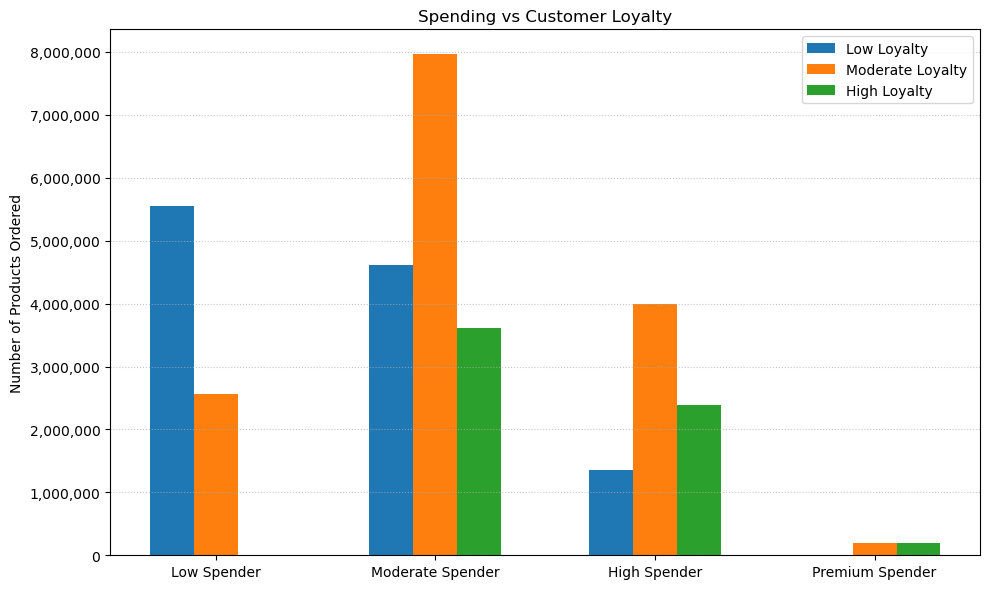

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.2.3_spending_loyalty.png


In [58]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_spending_loyalty.index))

# Plot each category as a separate bar (grouped format)
for i, spending_loyalty in enumerate(cross_spending_loyalty.columns):
    plt.bar(
        x + i * bar_width, 
        cross_spending_loyalty[spending_loyalty], 
        width=bar_width, 
        label=spending_loyalty
    )

# Formatting
plt.title('Spending vs Customer Loyalty')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_spending_loyalty.columns) - 1) / 2), cross_spending_loyalty.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.2.3_spending_loyalty.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.2.4. Region

In [60]:
# Create a cross-tabulation
cross_spending_region = pd.crosstab(df['spending_flag'], df['region'])
cross_spending_region

region,West,Midwest,South,Northeast
spending_flag,,,,
Low Spender,2062309,1890438,2708260,1443950
Moderate Spender,4158419,3818011,5324894,2888479
High Spender,1971133,1797006,2629569,1325869
Premium Spender,100780,91560,128790,64252


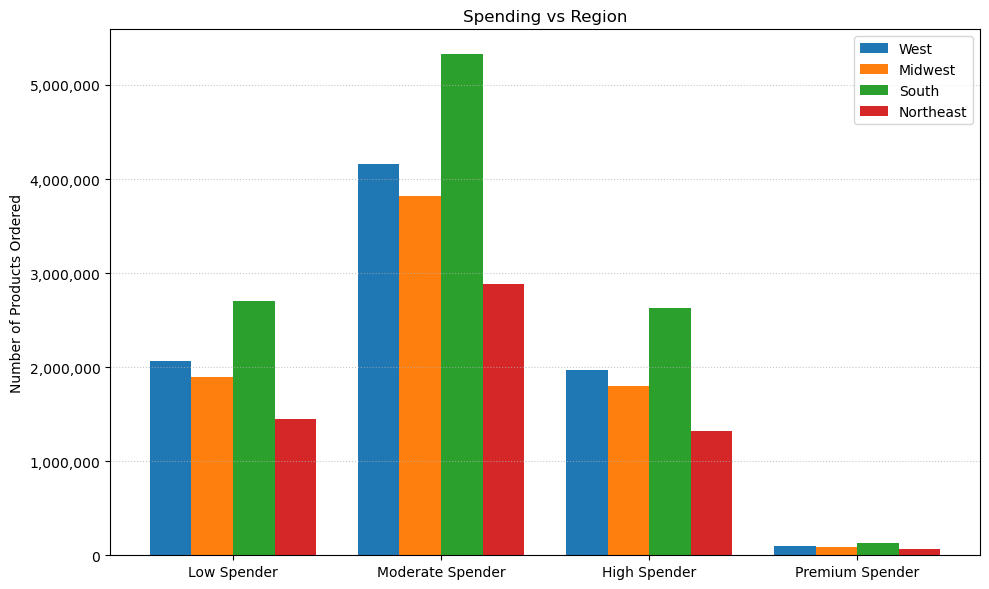

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.2.4_spending_region.png


In [61]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_spending_region.index))

# Plot each category as a separate bar (grouped format)
for i, spending_region in enumerate(cross_spending_region.columns):
    plt.bar(
        x + i * bar_width, 
        cross_spending_region[spending_region], 
        width=bar_width, 
        label=spending_region
    )

# Formatting
plt.title('Spending vs Region')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_spending_region.columns) - 1) / 2), cross_spending_region.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.2.4_spending_region.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.2.5. Age_Profile

In [63]:
# Create a cross-tabulation
cross_spending_age = pd.crosstab(df['spending_flag'], df['age_profile'])
cross_spending_age

age_profile,Young Adult,Adult,Middle Aged,Senior
spending_flag,,,,
Low Spender,1014982,2533496,2546655,2009824
Moderate Spender,2030330,5112042,5021786,4025645
High Spender,953636,2389624,2423886,1956431
Premium Spender,46083,120628,122780,95891


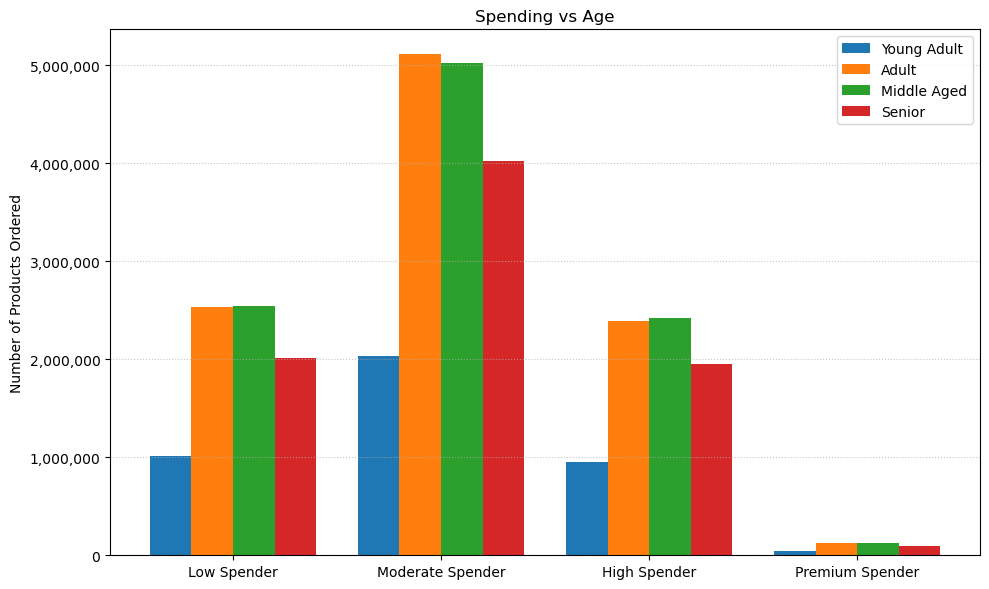

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.2.5_spending_age.png


In [64]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_spending_age.index))

# Plot each category as a separate bar (grouped format)
for i, spending_age in enumerate(cross_spending_age.columns):
    plt.bar(
        x + i * bar_width, 
        cross_spending_age[spending_age], 
        width=bar_width, 
        label=spending_age
    )

# Formatting
plt.title('Spending vs Age')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_spending_age.columns) - 1) / 2), cross_spending_age.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.2.5_spending_age.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.2.6. Income Profile

In [66]:
# Create a cross-tabulation
cross_spending_income = pd.crosstab(df['spending_flag'], df['income_profile'])
cross_spending_income

income_profile,Low Income,Middle Income,High Income
spending_flag,,,
Low Spender,4320056,2462003,1322898
Moderate Spender,2150152,9190892,4848759
High Spender,999821,4380196,2343560
Premium Spender,50904,219054,115424


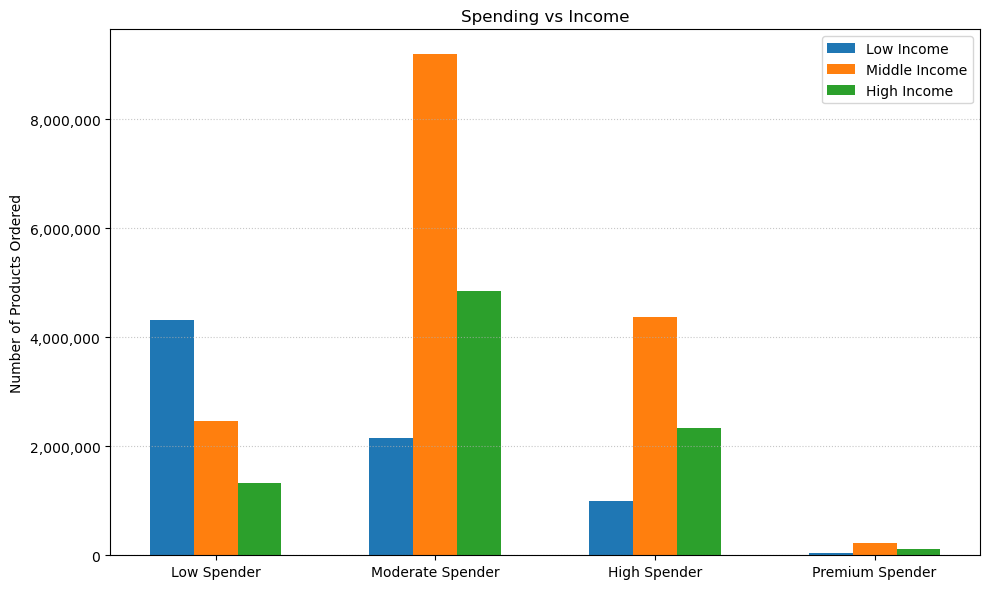

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.2.6_spending_income.png


In [67]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_spending_income.index))

# Plot each category as a separate bar (grouped format)
for i, spending_income in enumerate(cross_spending_income.columns):
    plt.bar(
        x + i * bar_width, 
        cross_spending_income[spending_income], 
        width=bar_width, 
        label=spending_income
    )

# Formatting
plt.title('Spending vs Income')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_spending_income.columns) - 1) / 2), cross_spending_income.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.2.6_spending_income.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.2.7. Family_Status

In [69]:
# Create a cross-tabulation
cross_spending_family = pd.crosstab(df['spending_flag'], df['family_status'])
cross_spending_family

family_status,Single Adult,Young Parent,Family
spending_flag,,,
Low Spender,2018531,382029,5704397
Moderate Spender,4072430,775785,11341588
High Spender,1913035,375168,5435374
Premium Spender,93301,17563,274518


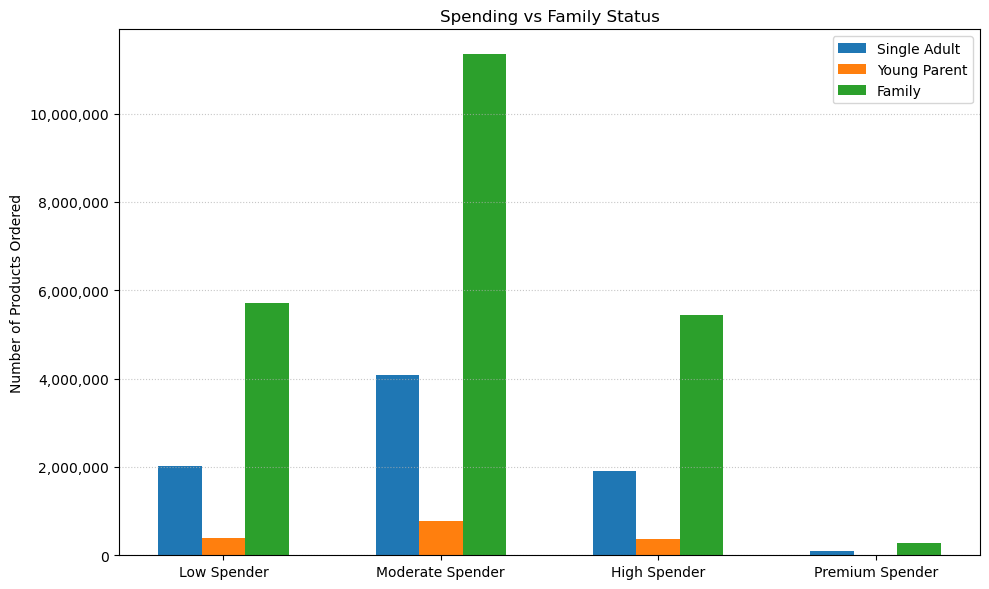

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.2.7_spending_family.png


In [70]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(cross_spending_family.index))

# Plot each category as a separate bar (grouped format)
for i, spending_family in enumerate(cross_spending_family.columns):
    plt.bar(
        x + i * bar_width, 
        cross_spending_family[spending_family], 
        width=bar_width, 
        label=spending_family
    )

# Formatting
plt.title('Spending vs Family Status')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(cross_spending_family.columns) - 1) / 2), cross_spending_family.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.2.7_spending_family.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 3.3. Frequency Flag

### 3.3.1. Activity Flag

In [73]:
# Create a cross-tabulation
user_frequency_activity = pd.crosstab(df['frequency_flag'], df['activity_flag'])
user_frequency_activity

activity_flag,Low Activity,Moderate Activity,High Activity
frequency_flag,,,
Rare Shopper,5200789,2488737,0
Occasional Shopper,2546930,10698341,1377721
Frequent Shopper,746193,2753682,6591326


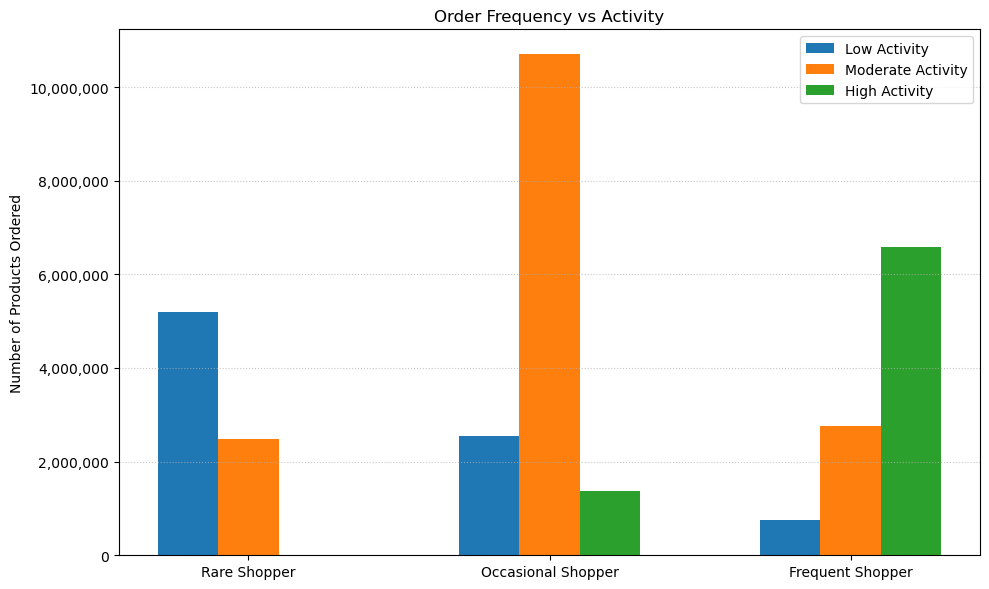

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.3.1_frequency_activity.png


In [74]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_frequency_activity.index))

# Plot each category as a separate bar (grouped format)
for i, frequency_activity in enumerate(user_frequency_activity.columns):
    plt.bar(
        x + i * bar_width, 
        user_frequency_activity[frequency_activity], 
        width=bar_width, 
        label=frequency_activity
    )

# Formatting
plt.title('Order Frequency vs Activity')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_frequency_activity.columns) - 1) / 2), user_frequency_activity.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.3.1_frequency_activity.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.3.2. Spending Flag

In [76]:
# Create a cross-tabulation
user_frequency_spending = pd.crosstab(df['frequency_flag'], df['spending_flag'])
user_frequency_spending

spending_flag,Low Spender,Moderate Spender,High Spender,Premium Spender
frequency_flag,,,,
Rare Shopper,2109265,3484638,1953774,141849
Occasional Shopper,3651333,7366217,3448690,156752
Frequent Shopper,2344359,5338948,2321113,86781


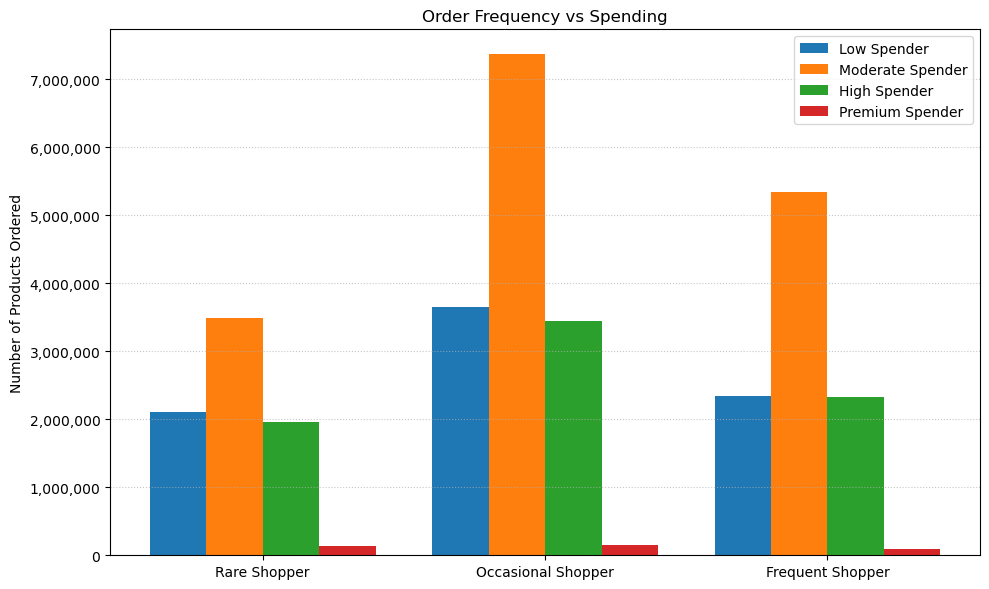

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.3.2_frequency_spending.png


In [77]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_frequency_spending.index))

# Plot each category as a separate bar (grouped format)
for i, frequency_spending in enumerate(user_frequency_spending.columns):
    plt.bar(
        x + i * bar_width, 
        user_frequency_spending[frequency_spending], 
        width=bar_width, 
        label=frequency_spending
    )

# Formatting
plt.title('Order Frequency vs Spending')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')


# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_frequency_spending.columns) - 1) / 2), user_frequency_spending.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.3.2_frequency_spending.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.3.3. Loyalty Flag

In [79]:
# Create a cross-tabulation
user_frequency_loyalty = pd.crosstab(df['frequency_flag'], df['loyalty_flag'])
user_frequency_loyalty

loyalty_flag,Low Loyalty,Moderate Loyalty,High Loyalty
frequency_flag,,,
Rare Shopper,6943662,745864,0
Occasional Shopper,4367364,9900778,354850
Frequent Shopper,204949,4061283,5824969


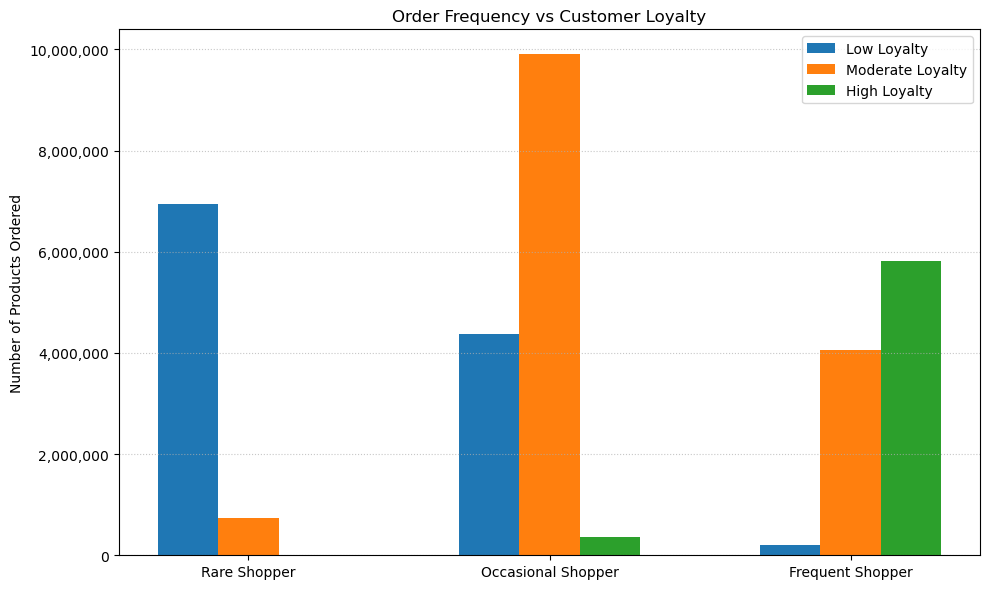

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.3.3_frequency_loyalty.png


In [80]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_frequency_loyalty.index))

# Plot each category as a separate bar (grouped format)
for i, frequency_loyalty in enumerate(user_frequency_loyalty.columns):
    plt.bar(
        x + i * bar_width, 
        user_frequency_loyalty[frequency_loyalty], 
        width=bar_width, 
        label=frequency_loyalty
    )

# Formatting
plt.title('Order Frequency vs Customer Loyalty')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_frequency_loyalty.columns) - 1) / 2), user_frequency_loyalty.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.3.3_frequency_loyalty.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.3.4. Region

In [82]:
# Create a cross-tabulation
user_frequency_region = pd.crosstab(df['frequency_flag'], df['region'])
user_frequency_region

region,West,Midwest,South,Northeast
frequency_flag,,,,
Rare Shopper,1942708,1823442,2561647,1361729
Occasional Shopper,3740337,3450095,4854372,2578188
Frequent Shopper,2609596,2323478,3375494,1782633


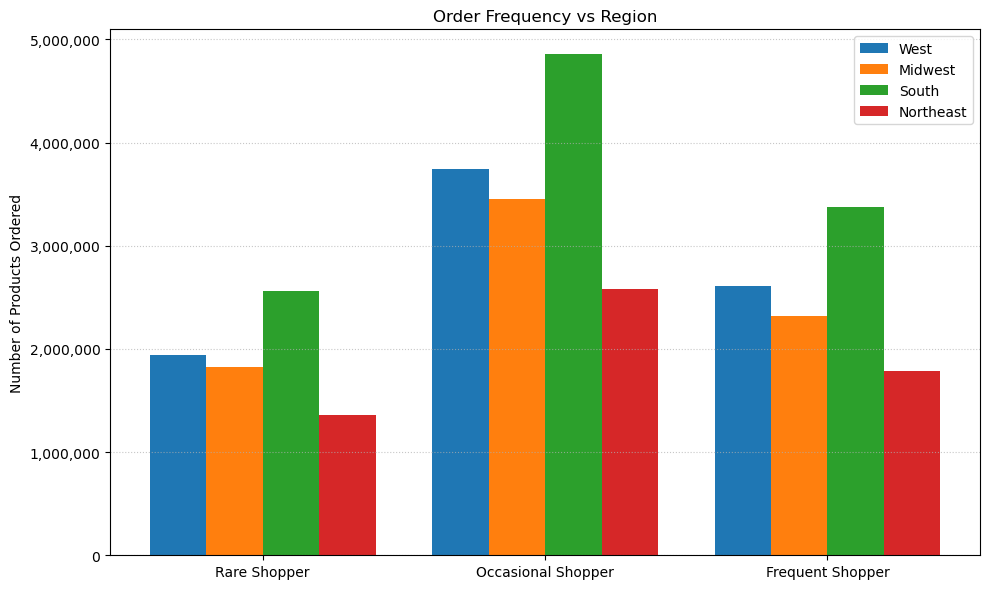

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.3.4_frequency_region.png


In [83]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_frequency_region.index))

# Plot each category as a separate bar (grouped format)
for i, frequency_region in enumerate(user_frequency_region.columns):
    plt.bar(
        x + i * bar_width, 
        user_frequency_region[frequency_region], 
        width=bar_width, 
        label=frequency_region
    )

# Formatting
plt.title('Order Frequency vs Region')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')


# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_frequency_region.columns) - 1) / 2), user_frequency_region.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.3.4_frequency_region.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.3.5. Age_Profile

In [85]:
# Create a cross-tabulation
user_frequency_age = pd.crosstab(df['frequency_flag'], df['age_profile'])
user_frequency_age

age_profile,Young Adult,Adult,Middle Aged,Senior
frequency_flag,,,,
Rare Shopper,953808,2390877,2432375,1912466
Occasional Shopper,1846226,4619494,4513449,3643823
Frequent Shopper,1244997,3145419,3169283,2531502


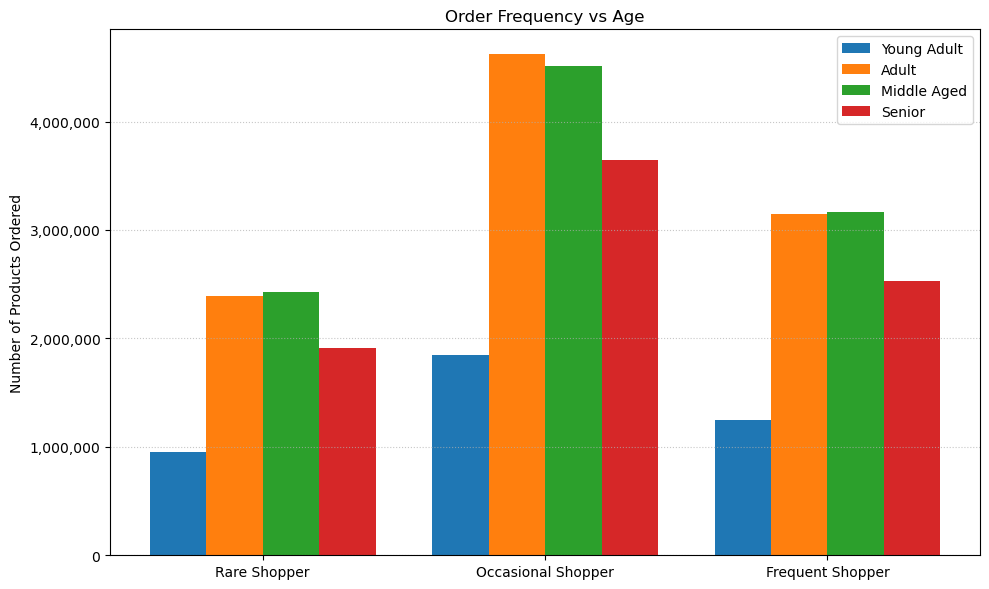

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.3.5_frequency_age.png


In [86]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_frequency_age.index))

# Plot each category as a separate bar (grouped format)
for i, frequency_age in enumerate(user_frequency_age.columns):
    plt.bar(
        x + i * bar_width, 
        user_frequency_age[frequency_age], 
        width=bar_width, 
        label=frequency_age
    )

# Formatting
plt.title('Order Frequency vs Age')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')


# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_frequency_age.columns) - 1) / 2), user_frequency_age.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.3.5_frequency_age.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.3.6. Income Profile

In [88]:
# Create a cross-tabulation
user_frequency_income = pd.crosstab(df['frequency_flag'], df['income_profile'])
user_frequency_income

income_profile,Low Income,Middle Income,High Income
frequency_flag,,,
Rare Shopper,1921472,3769884,1998170
Occasional Shopper,3436002,7318444,3868546
Frequent Shopper,2163459,5163817,2763925


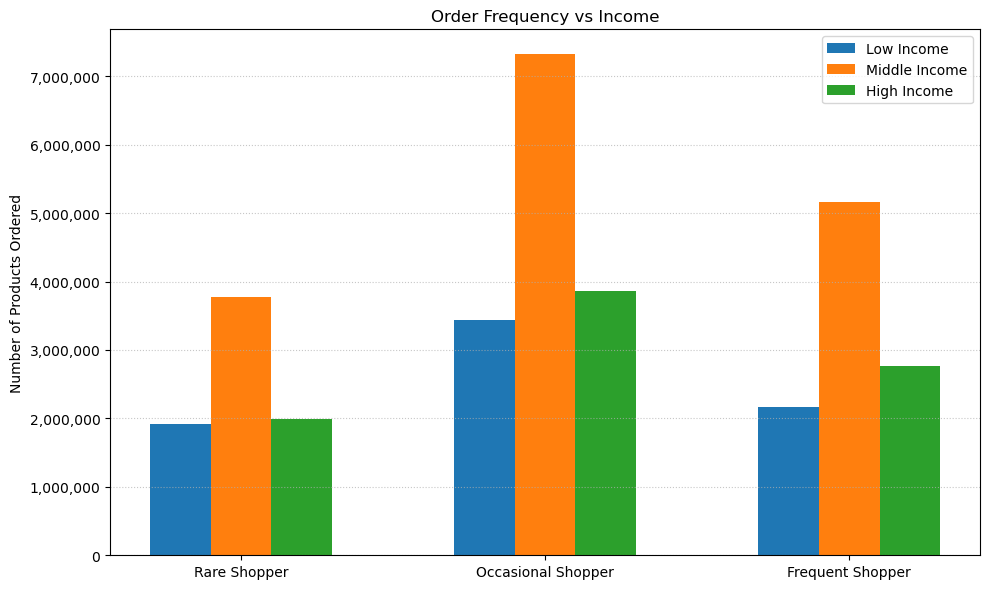

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.3.6_frequency_income.png


In [89]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_frequency_income.index))

# Plot each category as a separate bar (grouped format)
for i, frequency_income in enumerate(user_frequency_income.columns):
    plt.bar(
        x + i * bar_width, 
        user_frequency_income[frequency_income], 
        width=bar_width, 
        label=frequency_income
    )

# Formatting
plt.title('Order Frequency vs Income')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')


# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_frequency_income.columns) - 1) / 2), user_frequency_income.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.3.6_frequency_income.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.3.7. Family_Status

In [91]:
# Create a cross-tabulation
user_frequency_family = pd.crosstab(df['frequency_flag'], df['family_status'])
user_frequency_family

family_status,Single Adult,Young Parent,Family
frequency_flag,,,
Rare Shopper,1908441,360521,5420564
Occasional Shopper,3641531,706619,10274842
Frequent Shopper,2547325,483405,7060471


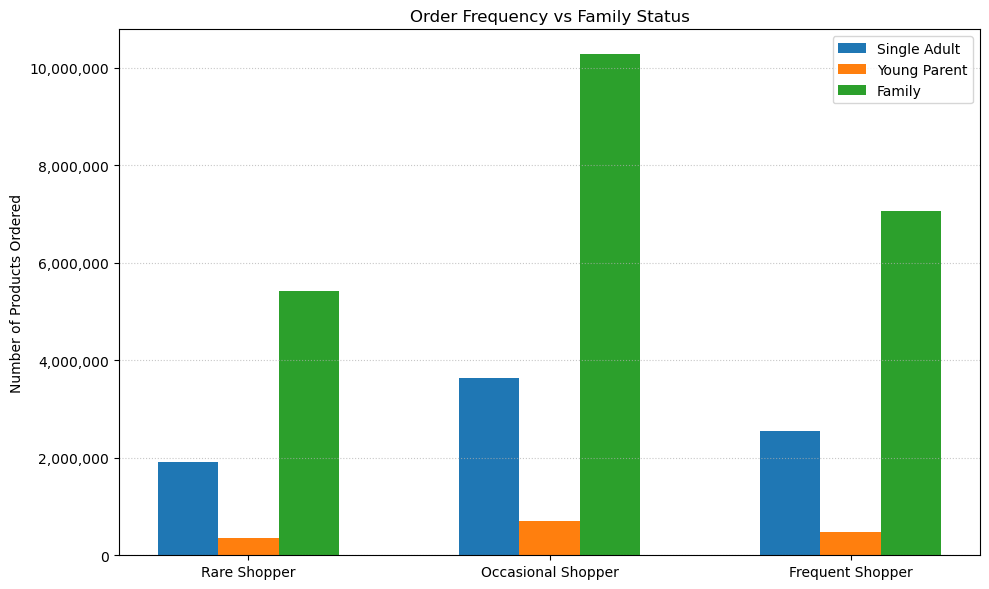

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.3.7_frequency_family.png


In [92]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_frequency_family.index))

# Plot each category as a separate bar (grouped format)
for i, frequency_family in enumerate(user_frequency_family.columns):
    plt.bar(
        x + i * bar_width, 
        user_frequency_family[frequency_family], 
        width=bar_width, 
        label=frequency_family
    )

# Formatting
plt.title('Order Frequency vs Family Status')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')


# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_frequency_family.columns) - 1) / 2), user_frequency_family.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.3.7_frequency_family.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 3.4. Loyalty Flag

### 3.4.1. Activity Flag

In [95]:
# Create a cross-tabulation
user_loyalty_activity = pd.crosstab(df['loyalty_flag'], df['activity_flag'])
user_loyalty_activity

activity_flag,Low Activity,Moderate Activity,High Activity
loyalty_flag,,,
Low Loyalty,7113377,4402598,0
Moderate Loyalty,1360508,10737006,2610411
High Loyalty,20027,801156,5358636


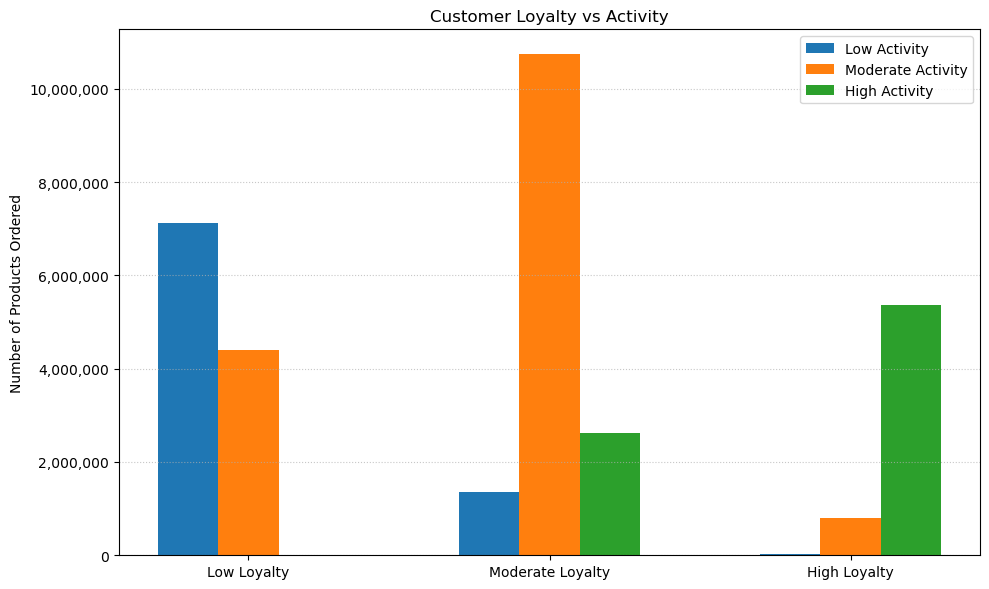

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.4.1_loyalty_activity.png


In [96]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_loyalty_activity.index))

# Plot each category as a separate bar (grouped format)
for i, loyalty_activity in enumerate(user_loyalty_activity.columns):
    plt.bar(
        x + i * bar_width, 
        user_loyalty_activity[loyalty_activity], 
        width=bar_width, 
        label=loyalty_activity
    )

# Formatting
plt.title('Customer Loyalty vs Activity')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_loyalty_activity.columns) - 1) / 2), user_loyalty_activity.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.4.1_loyalty_activity.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.4.2. Spending Flag

In [98]:
# Create a cross-tabulation
user_loyalty_spending = pd.crosstab(df['loyalty_flag'], df['spending_flag'])
user_loyalty_spending

spending_flag,Low Spender,Moderate Spender,High Spender,Premium Spender
loyalty_flag,,,,
Low Loyalty,5546505,4619711,1349759,0
Moderate Loyalty,2558452,7961102,3992118,196253
High Loyalty,0,3608990,2381700,189129


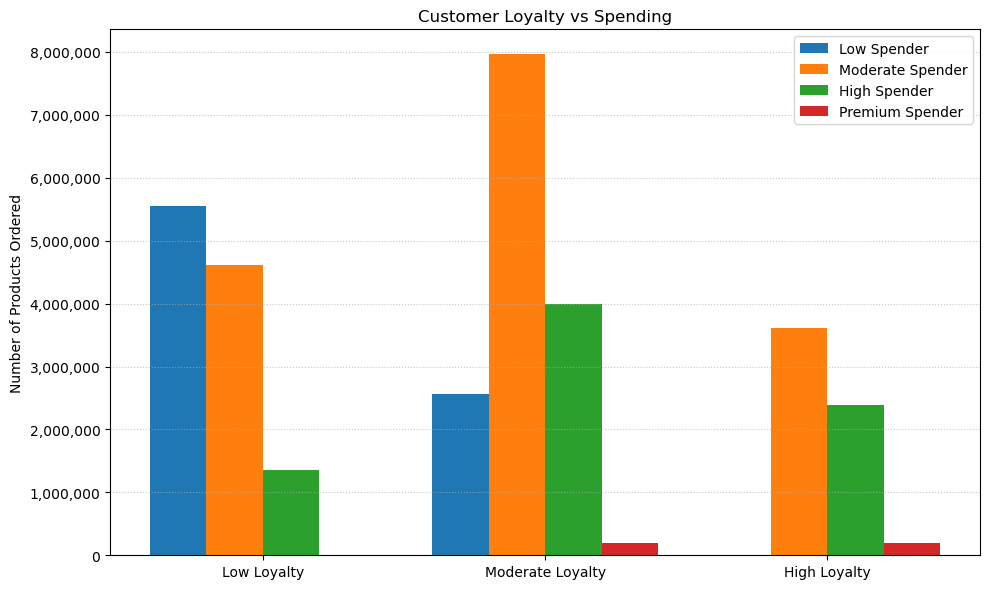

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.4.2_loyalty_spending.png


In [99]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_loyalty_spending.index))

# Plot each category as a separate bar (grouped format)
for i, loyalty_spending in enumerate(user_loyalty_spending.columns):
    plt.bar(
        x + i * bar_width, 
        user_loyalty_spending[loyalty_spending], 
        width=bar_width, 
        label=loyalty_spending
    )

# Formatting
plt.title('Customer Loyalty vs Spending')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')


# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_loyalty_spending.columns) - 1) / 2), user_loyalty_spending.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.4.2_loyalty_spending.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.4.3. Frequency Flag

In [101]:
# Create a cross-tabulation
user_loyalty_frequency = pd.crosstab(df['loyalty_flag'], df['frequency_flag'])
user_loyalty_frequency

frequency_flag,Rare Shopper,Occasional Shopper,Frequent Shopper
loyalty_flag,,,
Low Loyalty,6943662,4367364,204949
Moderate Loyalty,745864,9900778,4061283
High Loyalty,0,354850,5824969


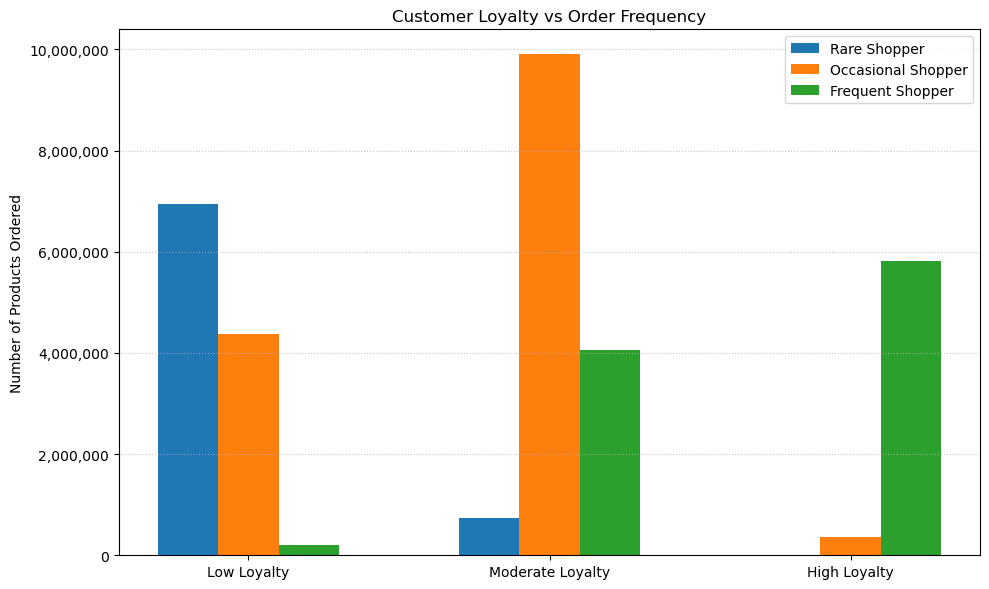

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.4.3_loyalty_frequency.png


In [102]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_loyalty_frequency.index))

# Plot each category as a separate bar (grouped format)
for i, loyalty_frequency in enumerate(user_loyalty_frequency.columns):
    plt.bar(
        x + i * bar_width, 
        user_loyalty_frequency[loyalty_frequency], 
        width=bar_width, 
        label=loyalty_frequency
    )

# Formatting
plt.title('Customer Loyalty vs Order Frequency')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_loyalty_frequency.columns) - 1) / 2), user_loyalty_frequency.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.4.3_loyalty_frequency.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.4.4. Region

In [104]:
# Create a cross-tabulation
user_loyalty_region = pd.crosstab(df['loyalty_flag'], df['region'])
user_loyalty_region

region,West,Midwest,South,Northeast
loyalty_flag,,,,
Low Loyalty,2915735,2722839,3827006,2050395
Moderate Loyalty,3730697,3469183,4912814,2595231
High Loyalty,1646209,1404993,2051693,1076924


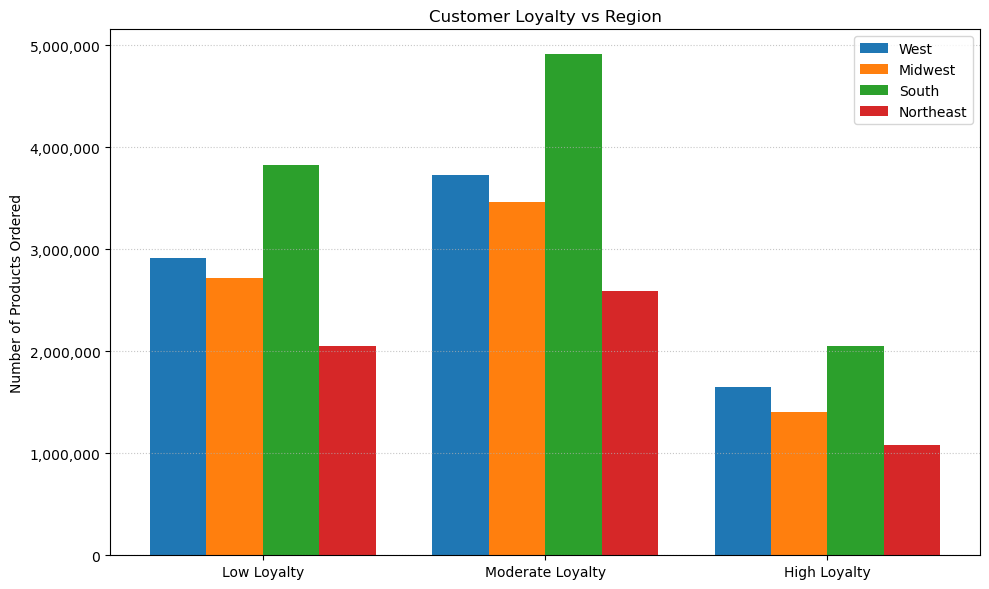

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.4.4_loyalty_region.png


In [105]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_loyalty_region.index))

# Plot each category as a separate bar (grouped format)
for i, loyalty_region in enumerate(user_loyalty_region.columns):
    plt.bar(
        x + i * bar_width, 
        user_loyalty_region[loyalty_region], 
        width=bar_width, 
        label=loyalty_region
    )

# Formatting
plt.title('Customer Loyalty vs Region')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_loyalty_region.columns) - 1) / 2), user_loyalty_region.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.4.4_loyalty_region.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.4.5. Age_Profile

In [107]:
# Create a cross-tabulation
user_loyalty_age = pd.crosstab(df['loyalty_flag'], df['age_profile'])
user_loyalty_age

age_profile,Young Adult,Adult,Middle Aged,Senior
loyalty_flag,,,,
Low Loyalty,1462701,3585478,3600609,2867187
Moderate Loyalty,1814513,4637250,4569874,3686288
High Loyalty,767817,1933062,1944624,1534316


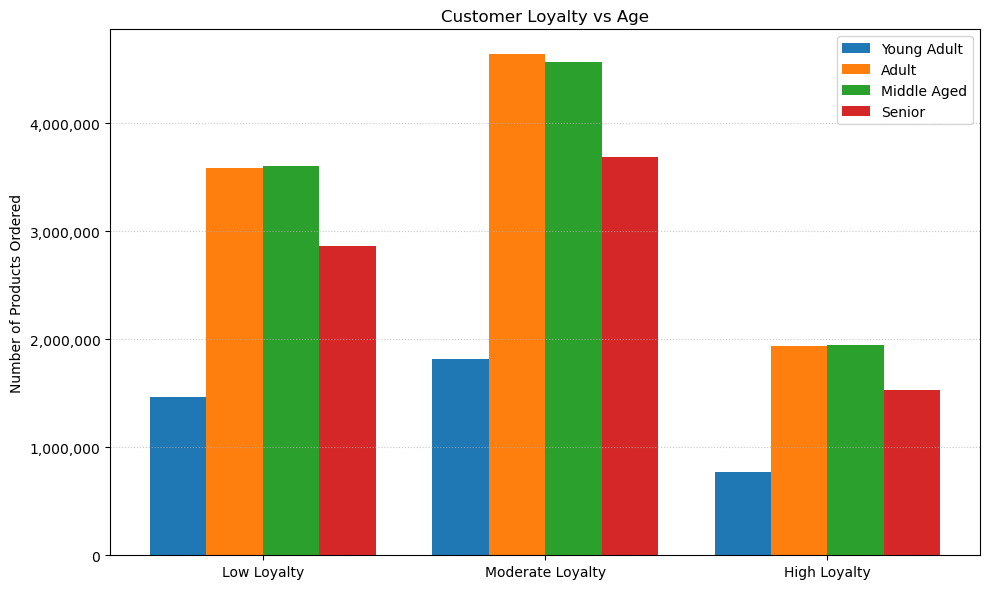

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.4.5_loyalty_age.png


In [108]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_loyalty_age.index))

# Plot each category as a separate bar (grouped format)
for i, loyalty_age in enumerate(user_loyalty_age.columns):
    plt.bar(
        x + i * bar_width, 
        user_loyalty_age[loyalty_age], 
        width=bar_width, 
        label=loyalty_age
    )

# Formatting
plt.title('Customer Loyalty vs Age')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_loyalty_age.columns) - 1) / 2), user_loyalty_age.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.4.5_loyalty_age.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.4.6. Income Profile

In [110]:
# Create a cross-tabulation
user_loyalty_income = pd.crosstab(df['loyalty_flag'], df['income_profile'])
user_loyalty_income

income_profile,Low Income,Middle Income,High Income
loyalty_flag,,,
Low Loyalty,3807729,5003515,2704731
Moderate Loyalty,2907271,7753601,4047053
High Loyalty,805933,3495029,1878857


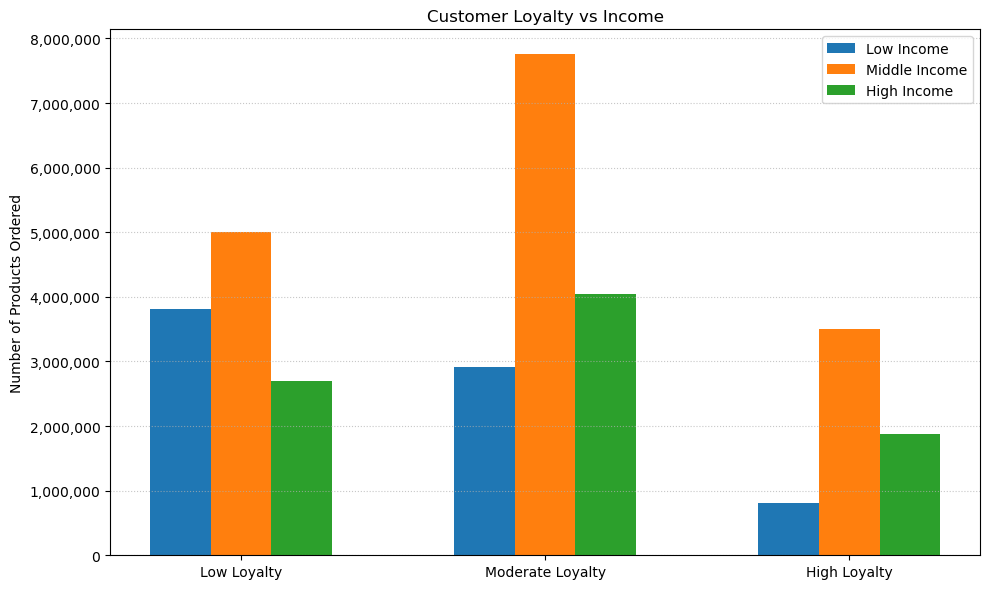

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.4.6_loyalty_income.png


In [111]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_loyalty_income.index))

# Plot each category as a separate bar (grouped format)
for i, loyalty_income in enumerate(user_loyalty_income.columns):
    plt.bar(
        x + i * bar_width, 
        user_loyalty_income[loyalty_income], 
        width=bar_width, 
        label=loyalty_income
    )

# Formatting
plt.title('Customer Loyalty vs Income')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_loyalty_income.columns) - 1) / 2), user_loyalty_income.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.4.6_loyalty_income.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.4.7. Family_Status

In [113]:
# Create a cross-tabulation
user_loyalty_family = pd.crosstab(df['loyalty_flag'], df['family_status'])
user_loyalty_family

family_status,Single Adult,Young Parent,Family
loyalty_flag,,,
Low Loyalty,2868516,556987,8090472
Moderate Loyalty,3642410,679991,10385524
High Loyalty,1586371,313567,4279881


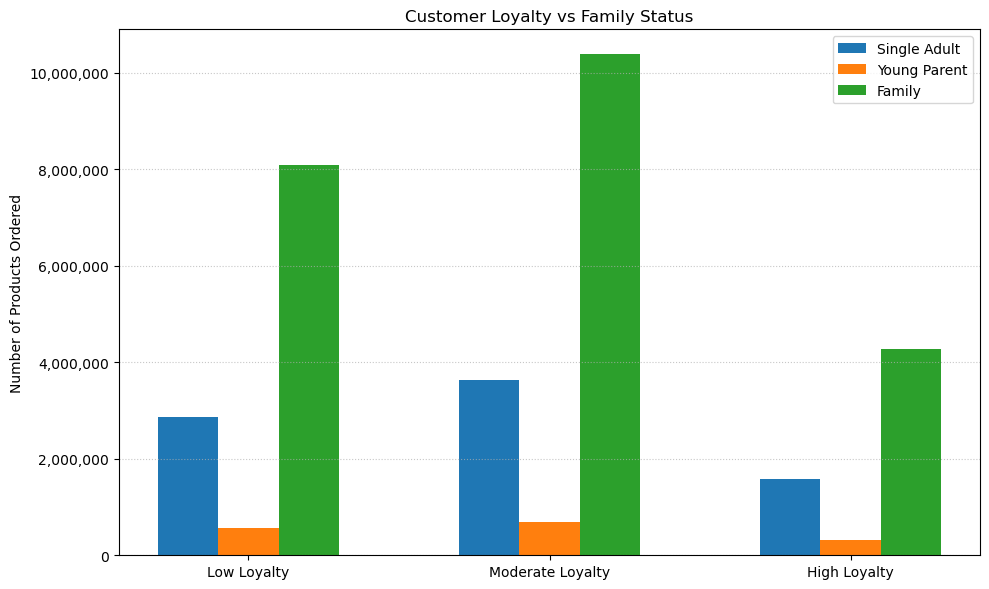

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.4.7_floyalty_family.png


In [114]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_loyalty_family.index))

# Plot each category as a separate bar (grouped format)
for i, loyalty_family in enumerate(user_loyalty_family.columns):
    plt.bar(
        x + i * bar_width, 
        user_loyalty_family[loyalty_family], 
        width=bar_width, 
        label=loyalty_family
    )

# Formatting
plt.title('Customer Loyalty vs Family Status')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_loyalty_family.columns) - 1) / 2), user_loyalty_family.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.4.7_floyalty_family.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 3.5. Region

### 3.5.1. Activity Flag

In [117]:
# Create a cross-tabulation
user_region_activity = pd.crosstab(df['region'], df['activity_flag'])
user_region_activity

activity_flag,Low Activity,Moderate Activity,High Activity
region,,,
West,2164805,4017636,2110200
Midwest,2008624,3789791,1798600
South,2824760,5316453,2650300
Northeast,1495723,2816880,1409947


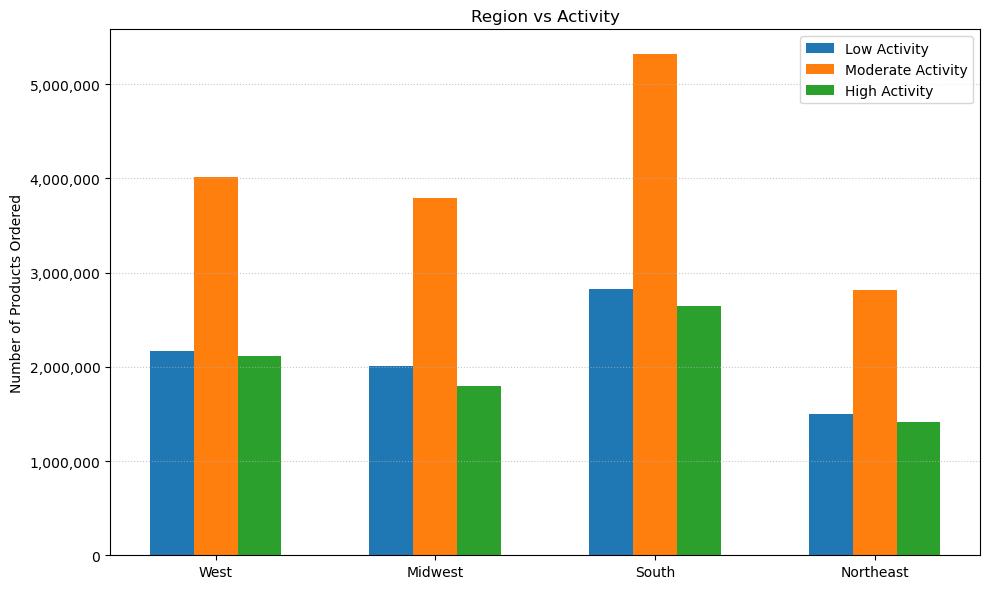

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.5.1_region_activity.png


In [118]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_region_activity.index))

# Plot each category as a separate bar (grouped format)
for i, region_activity in enumerate(user_region_activity.columns):
    plt.bar(
        x + i * bar_width, 
        user_region_activity[region_activity], 
        width=bar_width, 
        label=region_activity
    )

# Formatting
plt.title('Region vs Activity')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_region_activity.columns) - 1) / 2), user_region_activity.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.5.1_region_activity.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.5.2. Spending Flag

In [120]:
# Create a cross-tabulation
user_region_spending = pd.crosstab(df['region'], df['spending_flag'])
user_region_spending

spending_flag,Low Spender,Moderate Spender,High Spender,Premium Spender
region,,,,
West,2062309,4158419,1971133,100780
Midwest,1890438,3818011,1797006,91560
South,2708260,5324894,2629569,128790
Northeast,1443950,2888479,1325869,64252


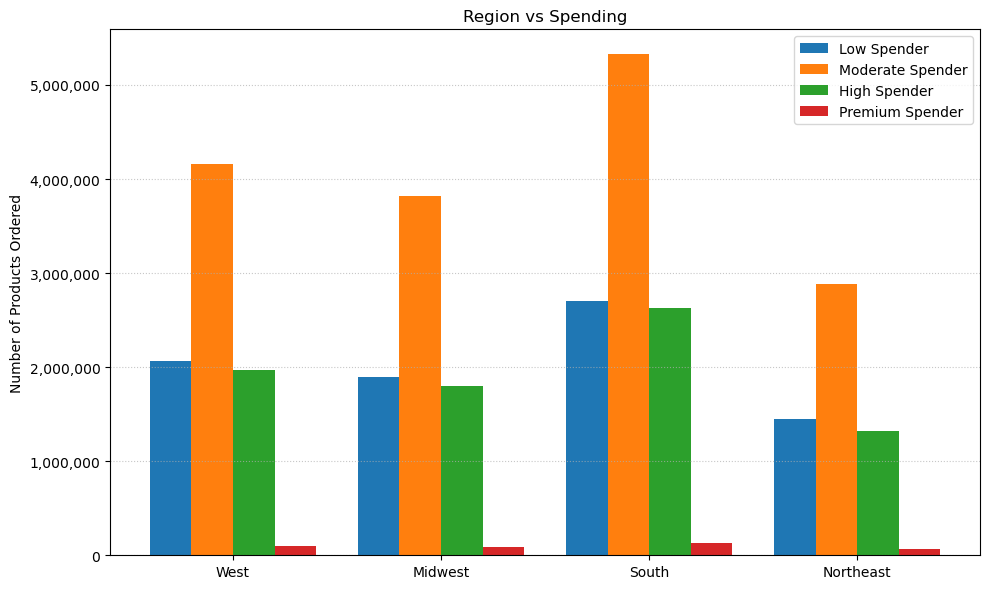

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.5.2_region_spending.png


In [121]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_region_spending.index))

# Plot each category as a separate bar (grouped format)
for i, region_spending in enumerate(user_region_spending.columns):
    plt.bar(
        x + i * bar_width, 
        user_region_spending[region_spending], 
        width=bar_width, 
        label=region_spending
    )

# Formatting
plt.title('Region vs Spending')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_region_spending.columns) - 1) / 2), user_region_spending.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.5.2_region_spending.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.5.3. Frequency Flag

In [123]:
# Create a cross-tabulation
user_region_frequency = pd.crosstab(df['region'], df['frequency_flag'])
user_region_frequency

frequency_flag,Rare Shopper,Occasional Shopper,Frequent Shopper
region,,,
West,1942708,3740337,2609596
Midwest,1823442,3450095,2323478
South,2561647,4854372,3375494
Northeast,1361729,2578188,1782633


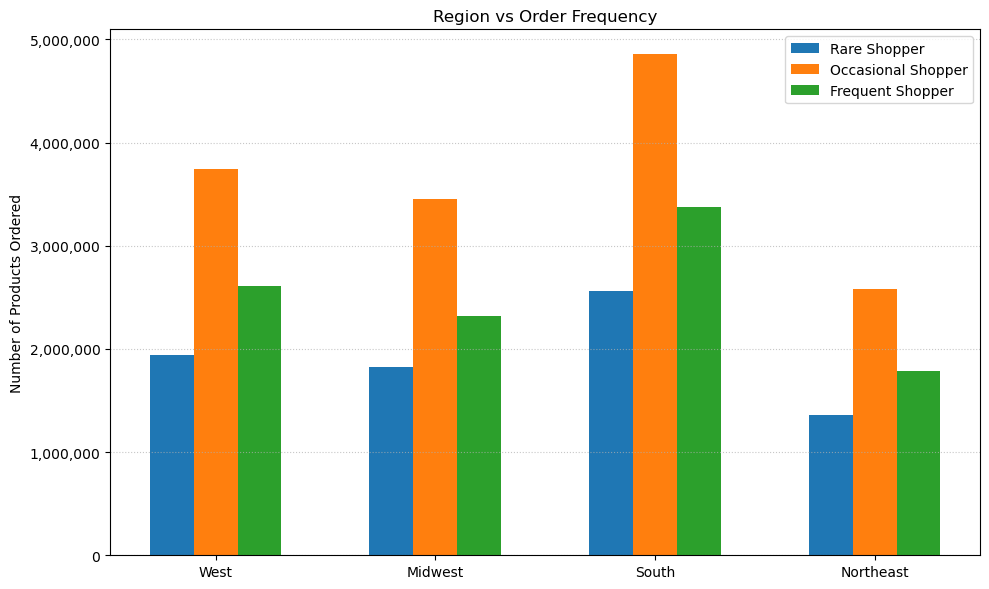

Chart successfully saved at: /Users/davidgriesel/Documents/Analytics/Projects/Online Grocery Store/04 - Analysis/Visualisations/CrossProfiles/3.5.3_region_frequency.png


In [124]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_region_frequency.index))

# Plot each category as a separate bar (grouped format)
for i, region_frequency in enumerate(user_region_frequency.columns):
    plt.bar(
        x + i * bar_width, 
        user_region_frequency[region_frequency], 
        width=bar_width, 
        label=region_frequency
    )

# Formatting
plt.title('Region vs Order Frequency')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_region_frequency.columns) - 1) / 2), user_region_frequency.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.5.3_region_frequency.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.5.4. Loyalty Flag

In [ ]:
# Create a cross-tabulation
user_region_loyalty = pd.crosstab(df['region'], df['loyalty_flag'])
user_region_loyalty

In [ ]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_region_loyalty.index))

# Plot each category as a separate bar (grouped format)
for i, region_loyalty in enumerate(user_region_loyalty.columns):
    plt.bar(
        x + i * bar_width, 
        user_region_loyalty[region_loyalty], 
        width=bar_width, 
        label=region_loyalty
    )

# Formatting
plt.title('Region vs Customer Loyalty')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_region_loyalty.columns) - 1) / 2), user_region_loyalty.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.5.4_region_loyalty.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.5.5. Age_Profile

In [ ]:
# Create a cross-tabulation
user_region_age = pd.crosstab(df['region'], df['age_profile'])
user_region_age

In [ ]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_region_age.index))

# Plot each category as a separate bar (grouped format)
for i, region_age in enumerate(user_region_age.columns):
    plt.bar(
        x + i * bar_width, 
        user_region_age[region_age], 
        width=bar_width, 
        label=region_age
    )

# Formatting
plt.title('Region vs Age')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_region_age.columns) - 1) / 2), user_region_age.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.5.5_region_age.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.5.6. Income Profile

In [ ]:
# Create a cross-tabulation
user_region_income = pd.crosstab(df['region'], df['income_profile'])
user_region_income

In [ ]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_region_income.index))

# Plot each category as a separate bar (grouped format)
for i, region_income in enumerate(user_region_income.columns):
    plt.bar(
        x + i * bar_width, 
        user_region_income[region_income], 
        width=bar_width, 
        label=region_income
    )

# Formatting
plt.title('Region vs Income')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_region_income.columns) - 1) / 2), user_region_income.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.5.6_region_income.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.5.7. Family_Status

In [ ]:
# Create a cross-tabulation
user_region_family = pd.crosstab(df['region'], df['family_status'])
user_region_family

In [ ]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_region_family.index))

# Plot each category as a separate bar (grouped format)
for i, region_family in enumerate(user_region_family.columns):
    plt.bar(
        x + i * bar_width, 
        user_region_family[region_family], 
        width=bar_width, 
        label=region_family
    )

# Formatting
plt.title('Region vs Family Status')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_region_family.columns) - 1) / 2), user_region_family.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.5.7_region_family.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 3.6. Age Profile

### 3.6.1. Activity Flag

In [ ]:
# Create a cross-tabulation
user_age_activity = pd.crosstab(df['age_profile'], df['activity_flag'])
user_age_activity

In [ ]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_age_activity.index))

# Plot each category as a separate bar (grouped format)
for i, age_activity in enumerate(user_age_activity.columns):
    plt.bar(
        x + i * bar_width, 
        user_age_activity[age_activity], 
        width=bar_width, 
        label=age_activity
    )

# Formatting
plt.title('Age vs Activity')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_age_activity.columns) - 1) / 2), user_age_activity.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.6.1_age_activity.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.6.2. Spending Flag

In [ ]:
# Create a cross-tabulation
user_age_spending = pd.crosstab(df['age_profile'], df['spending_flag'])
user_age_spending

In [ ]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_age_spending.index))

# Plot each category as a separate bar (grouped format)
for i, age_spending in enumerate(user_age_spending.columns):
    plt.bar(
        x + i * bar_width, 
        user_age_spending[age_spending], 
        width=bar_width, 
        label=age_spending
    )

# Formatting
plt.title('Age vs Spending')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_age_spending.columns) - 1) / 2), user_age_spending.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.6.2_age_spending.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.6.3. Frequency Flag

In [ ]:
# Create a cross-tabulation
user_age_frequency = pd.crosstab(df['age_profile'], df['frequency_flag'])
user_age_frequency

In [ ]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_age_frequency.index))

# Plot each category as a separate bar (grouped format)
for i, age_frequency in enumerate(user_age_frequency.columns):
    plt.bar(
        x + i * bar_width, 
        user_age_frequency[age_frequency], 
        width=bar_width, 
        label=age_frequency
    )

# Formatting
plt.title('Age vs Order Frequency')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_age_frequency.columns) - 1) / 2), user_age_frequency.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.6.3_age_frequency.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.6.4. Loyalty Flag

In [ ]:
# Create a cross-tabulation
user_age_loyalty = pd.crosstab(df['age_profile'], df['loyalty_flag'])
user_age_loyalty

In [ ]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_age_loyalty.index))

# Plot each category as a separate bar (grouped format)
for i, age_loyalty in enumerate(user_age_loyalty.columns):
    plt.bar(
        x + i * bar_width, 
        user_age_loyalty[age_loyalty], 
        width=bar_width, 
        label=age_loyalty
    )

# Formatting
plt.title('Age vs Customer Loyalty')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_age_loyalty.columns) - 1) / 2), user_age_loyalty.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.6.4_age_loyalty.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.6.5. Region

In [ ]:
# Create a cross-tabulation
user_age_region = pd.crosstab(df['age_profile'], df['region'])
user_age_region

In [ ]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_age_region.index))

# Plot each category as a separate bar (grouped format)
for i, age_region in enumerate(user_age_region.columns):
    plt.bar(
        x + i * bar_width, 
        user_age_region[age_region], 
        width=bar_width, 
        label=age_region
    )

# Formatting
plt.title('Age vs Region')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_age_region.columns) - 1) / 2), user_age_region.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.6.5_age_region.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.6.6. Income Profile

In [ ]:
# Create a cross-tabulation
user_age_income = pd.crosstab(df['age_profile'], df['income_profile'])
user_age_income

In [ ]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_age_income.index))

# Plot each category as a separate bar (grouped format)
for i, age_income in enumerate(user_age_income.columns):
    plt.bar(
        x + i * bar_width, 
        user_age_income[age_income], 
        width=bar_width, 
        label=age_income
    )

# Formatting
plt.title('Age vs Income')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_age_income.columns) - 1) / 2), user_age_income.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.6.6_age_income.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.6.7. Family_Status

In [ ]:
# Create a cross-tabulation
user_age_family = pd.crosstab(df['age_profile'], df['family_status'])
user_age_family

In [ ]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_age_family.index))

# Plot each category as a separate bar (grouped format)
for i, age_family in enumerate(user_age_family.columns):
    plt.bar(
        x + i * bar_width, 
        user_age_family[age_family], 
        width=bar_width, 
        label=age_family
    )

# Formatting
plt.title('Age vs Family Status')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_age_family.columns) - 1) / 2), user_age_family.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.6.7_age_family.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 3.7. Income Profile

### 3.7.1. Activity Flag

In [ ]:
# Create a cross-tabulation
user_income_activity = pd.crosstab(df['income_profile'], df['activity_flag'])
user_income_activity

In [ ]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_income_activity.index))

# Plot each category as a separate bar (grouped format)
for i, income_activity in enumerate(user_income_activity.columns):
    plt.bar(
        x + i * bar_width, 
        user_income_activity[income_activity], 
        width=bar_width, 
        label=income_activity
    )

# Formatting
plt.title('Income vs Activity')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_income_activity.columns) - 1) / 2), user_income_activity.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.7.1_income_activity.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.7.2. Spending Flag

In [ ]:
# Create a cross-tabulation
user_income_spending = pd.crosstab(df['income_profile'], df['spending_flag'])
user_income_spending

In [ ]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_income_spending.index))

# Plot each category as a separate bar (grouped format)
for i, income_spending in enumerate(user_income_spending.columns):
    plt.bar(
        x + i * bar_width, 
        user_income_spending[income_spending], 
        width=bar_width, 
        label=income_spending
    )

# Formatting
plt.title('Income vs Spending')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_income_spending.columns) - 1) / 2), user_income_spending.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.7.2_income_spending.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.7.3. Frequency Flag

In [ ]:
# Create a cross-tabulation
user_income_frequency = pd.crosstab(df['income_profile'], df['frequency_flag'])
user_income_frequency

In [ ]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_income_frequency.index))

# Plot each category as a separate bar (grouped format)
for i, income_frequency in enumerate(user_income_frequency.columns):
    plt.bar(
        x + i * bar_width, 
        user_income_frequency[income_frequency], 
        width=bar_width, 
        label=income_frequency
    )

# Formatting
plt.title('Income vs Order Frequency')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_income_frequency.columns) - 1) / 2), user_income_frequency.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.7.3_income_frequency.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.7.4. Loyalty Flag

In [ ]:
# Create a cross-tabulation
user_income_loyalty = pd.crosstab(df['income_profile'], df['loyalty_flag'])
user_income_loyalty

In [ ]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_income_loyalty.index))

# Plot each category as a separate bar (grouped format)
for i, income_loyalty in enumerate(user_income_loyalty.columns):
    plt.bar(
        x + i * bar_width, 
        user_income_loyalty[income_loyalty], 
        width=bar_width, 
        label=income_loyalty
    )

# Formatting
plt.title('Income vs Customer Loyalty')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_income_loyalty.columns) - 1) / 2), user_income_loyalty.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.7.4_income_loyalty.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.7.5. Region

In [ ]:
# Create a cross-tabulation
user_income_region = pd.crosstab(df['income_profile'], df['region'])
user_income_region

In [ ]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_income_region.index))

# Plot each category as a separate bar (grouped format)
for i, income_region in enumerate(user_income_region.columns):
    plt.bar(
        x + i * bar_width, 
        user_income_region[income_region], 
        width=bar_width, 
        label=income_region
    )

# Formatting
plt.title('Income vs Region')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_income_region.columns) - 1) / 2), user_income_region.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.7.5_income_region.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.7.6. Age Profile

In [ ]:
# Create a cross-tabulation
user_income_age = pd.crosstab(df['income_profile'], df['age_profile'])
user_income_age

In [ ]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_income_age.index))

# Plot each category as a separate bar (grouped format)
for i, income_age in enumerate(user_income_age.columns):
    plt.bar(
        x + i * bar_width, 
        user_income_age[income_age], 
        width=bar_width, 
        label=income_age
    )

# Formatting
plt.title('Income vs Age')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_income_age.columns) - 1) / 2), user_income_age.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.7.6_income_age.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.7.7. Family_Status

In [ ]:
# Create a cross-tabulation
user_income_family = pd.crosstab(df['income_profile'], df['family_status'])
user_income_family

In [ ]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_income_family.index))

# Plot each category as a separate bar (grouped format)
for i, income_family in enumerate(user_income_family.columns):
    plt.bar(
        x + i * bar_width, 
        user_income_family[income_family], 
        width=bar_width, 
        label=income_family
    )

# Formatting
plt.title('Income vs Family Status')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_income_family.columns) - 1) / 2), user_income_family.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.7.7_income_family.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 3.8. Family Status

### 3.8.1. Activity Flag

In [ ]:
# Create a cross-tabulation
user_family_activity = pd.crosstab(df['family_status'], df['activity_flag'])
user_family_activity

In [ ]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_family_activity.index))

# Plot each category as a separate bar (grouped format)
for i, family_activity in enumerate(user_family_activity.columns):
    plt.bar(
        x + i * bar_width, 
        user_family_activity[family_activity], 
        width=bar_width, 
        label=family_activity
    )

# Formatting
plt.title('Family Status vs Activity')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_family_activity.columns) - 1) / 2), user_family_activity.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.8.1_family_activity.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.8.2. Spending Flag

In [ ]:
# Create a cross-tabulation
user_family_spending = pd.crosstab(df['family_status'], df['spending_flag'])
user_family_spending

In [ ]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_family_spending.index))

# Plot each category as a separate bar (grouped format)
for i, family_spending in enumerate(user_family_spending.columns):
    plt.bar(
        x + i * bar_width, 
        user_family_spending[family_spending], 
        width=bar_width, 
        label=family_spending
    )

# Formatting
plt.title('Family Status vs Spending')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_family_spending.columns) - 1) / 2), user_family_spending.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.8.2_family_spending.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.8.3. Frequency Flag

In [ ]:
# Create a cross-tabulation
user_family_frequency = pd.crosstab(df['family_status'], df['frequency_flag'])
user_family_frequency

In [ ]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_family_frequency.index))

# Plot each category as a separate bar (grouped format)
for i, family_frequency in enumerate(user_family_frequency.columns):
    plt.bar(
        x + i * bar_width, 
        user_family_frequency[family_frequency], 
        width=bar_width, 
        label=family_frequency
    )

# Formatting
plt.title('Family Status vs Order Frequency')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_family_frequency.columns) - 1) / 2), user_family_frequency.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.8.3_family_frequency.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.8.4. Loyalty Flag

In [ ]:
# Create a cross-tabulation
user_family_loyalty = pd.crosstab(df['family_status'], df['loyalty_flag'])
user_family_loyalty

In [ ]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_family_loyalty.index))

# Plot each category as a separate bar (grouped format)
for i, family_loyalty in enumerate(user_family_loyalty.columns):
    plt.bar(
        x + i * bar_width, 
        user_family_loyalty[family_loyalty], 
        width=bar_width, 
        label=family_loyalty
    )

# Formatting
plt.title('Family Status vs Customer Loyalty')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_family_loyalty.columns) - 1) / 2), user_family_loyalty.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.8.4_family_loyalty.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.8.5. Region

In [ ]:
# Create a cross-tabulation
user_family_region = pd.crosstab(df['family_status'], df['region'])
user_family_region

In [ ]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_family_region.index))

# Plot each category as a separate bar (grouped format)
for i, family_region in enumerate(user_family_region.columns):
    plt.bar(
        x + i * bar_width, 
        user_family_region[family_region], 
        width=bar_width, 
        label=family_region
    )

# Formatting
plt.title('Family Status vs Region')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_family_region.columns) - 1) / 2), user_family_region.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.8.5_family_region.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.8.6. Age Profile

In [ ]:
# Create a cross-tabulation
user_family_age = pd.crosstab(df['family_status'], df['age_profile'])
user_family_age

In [ ]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_family_age.index))

# Plot each category as a separate bar (grouped format)
for i, family_age in enumerate(user_family_age.columns):
    plt.bar(
        x + i * bar_width, 
        user_family_age[family_age], 
        width=bar_width, 
        label=family_age
    )

# Formatting
plt.title('Family Status vs Age')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_family_age.columns) - 1) / 2), user_family_age.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.8.6_family_age.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 3.8.7. Income Profile

In [ ]:
# Create a cross-tabulation
user_family_income = pd.crosstab(df['family_status'], df['income_profile'])
user_family_income

In [ ]:
# Create figure
plt.figure(figsize=(10, 6))

# Define bar width and x positions
bar_width = 0.2
x = np.arange(len(user_family_income.index))

# Plot each category as a separate bar (grouped format)
for i, family_income in enumerate(user_family_income.columns):
    plt.bar(
        x + i * bar_width, 
        user_family_income[family_income], 
        width=bar_width, 
        label=family_income
    )

# Formatting
plt.title('Family Status vs Income')
plt.xlabel('')
plt.ylabel('Number of Products Ordered')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Center x-axis labels to align with grouped bars
plt.xticks(x + (bar_width * (len(user_family_income.columns) - 1) / 2), user_family_income.index)

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/CrossProfiles', '3.8.7_family_income.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")